# The Ricardian Trade Model

## The Model

#### Production Technologies

The economy produces tow goods $X$ and $Y$. Labor is the only input into production and there are a total of $\bar L$ workers. Production in the $X$ sector takes place using a linear constant returns to scaleproduction technology. If $L_X$ workers are employed in the sector total output will be:

$$Q_X = MPL_X \cdot L_X$$

$MPL_X$ is the constant **marginal product of labor** in the $X$ sector measured in *units of good $X$ per unit labor*.

Production in the $Y$ sector takes place using a linear constant returns to scale production technology. If $L_Y$ workers are employed in the sector total output will be:

$$Q_Y = MPL_Y \cdot L_Y$$

$MPL_Y$ is the constant marginal product of labor in the $Y$ sector measured in *units of good $Y$ per unit labor*.

#### Labor resource constraint

Total labor employed in the two sectors cannot exceed total available labor in the economy:

$$L_X + L_Y = \bar L$$

#### Equilibrium domestic relative prices

We can turn around the first two equations to get labor input requirements as a function of outputs:
    
$$L_X = \frac{1}{MPL_X} Q_X$$
$$L_Y = \frac{1}{MPL_Y} Q_Y$$

Here  $a_{Li} = \frac{1}{MPL_i}$ is interpreted as the **unit labor requirement** in sector $i$, measured in *units of labor unit of good $i$*.  

Note that firms in each sector facing a competitive market for labor will hire workers up to the point where the **marginal value product of labor** in sector $i$ is equal to the market wage:

$$P_X \cdot MPL_X = w = P_Y \cdot MPL_Y$$

We can re-arrange these to find expressions for the **marginal cost** of producing one more unit of good $X$ or good $Y$.

$$MC_X = w \cdot \frac{1}{MPL_X} = P_X$$
and
$$MC_Y = w \cdot \frac{1}{MPL_Y} = P_Y$$

Given the linear production function marginal cost is constant and equals average cost at any level of output.

The ratio of these last two gives us an expression for the equilibrium **domestic relative price of good $X$ measured in terms of good $Y$**

$$\frac{P_X}{P_Y}  = \frac{MPL_Y}{MPL_X}$$

An interesting and important property of this Classical Ricardian linear production technology model is thatwe can find this equilibrium relative prices can be solved for independently of the nature of consumer preferences or the size of the labor endowment. These relative prices are determined entirely by the ratio of these two constant marginal products.

#### notebook preliminaries

Import matplotlib's pyplot, numpy and other python libraries.

In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
%matplotlib inline

Set style and other parameters for matplotlib plots:

In [2]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18

## Technology and endowments
Let's start with an example economy

In [3]:
LBAR = 100
MPLX = 1
MPLY = 1

NAMEX = 'Good X'
NAMEY = 'Good Y'

XMAX = LBAR*MPLX*4   # for plot bounds
YMAX = LBAR*MPLY*4

N = 50      # num of datapoints to plot
QX =  np.linspace(0, XMAX, N)

This function will lbe used to plot Home's production possibility frontier (PPF) for any set of $MPL_X$, $MPL_Y$ and $\bar L$.

In [4]:
def ppf(mplx, mply, lbar, show = True, title='Home'):   
    '''Plot a linear PPF diagram 
       show == False delays plt.show() to allow other elements to be plotted first'''
    qy = mply*lbar - (mply/mplx) * QX
    plt.plot(QX, qy, linewidth=2, label='PPF')
    plt.axis([0,XMAX,0,YMAX])
    plt.xlabel(NAMEX), plt.ylabel(NAMEY), plt.title(title)
    plt.text(0.3*XMAX, 0.9*YMAX, 
             r'   $\frac{MPL_X}{MPL_Y}=$'+'{:3.2f}'.format(mplx/mply))
    if show: #use False for subplots
        plt.show();

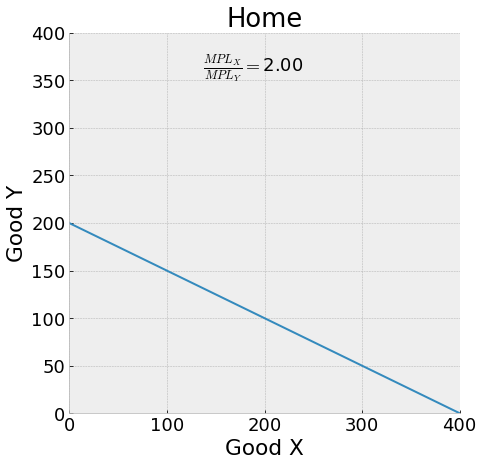

In [5]:
ppf(mplx=2, mply=1, lbar=200)

### Interactive diagram
The next cell's output is only visible and interactive if are running this on a jupyter notebook server.

In [11]:
interact(ppf, mplx=(0.5,2,0.1), mply=(0.5,2,0.1), lbar=(50, 200, 10),show=fixed(True), title=fixed('Home'));

## Opening to Trade

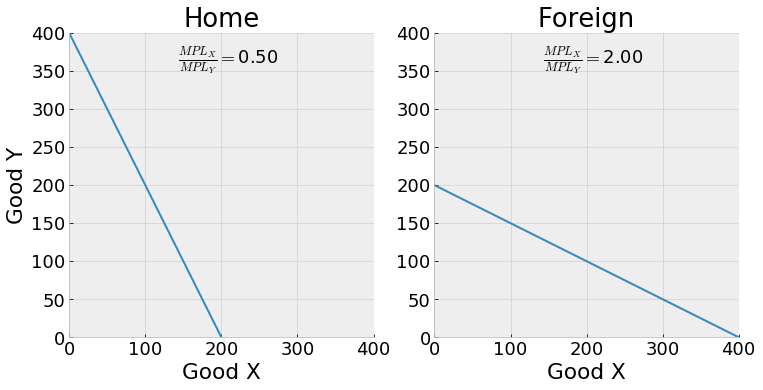

In [7]:
foreign = ppf

f1 = plt.figure(1, figsize =(12,12))
#ax = plt.gca().set_aspect('equal')
plt.subplot(121, aspect='equal')
ppf(1, 2, 200, show = False)
plt.subplot(122, aspect='equal')
foreign(2, 1, 200, show=False, title='Foreign')
plt.ylabel('');


In [8]:
def homeopen(pw, mplx, mply, lbar, show=True, title='Home'):
    ppf(mplx, mply, lbar, show=False, title=title)
    if pw<(mplx/mply):
        plt.plot(QX, lbar*mply -pw*QX, ':')
    else:
        plt.plot(QX, lbar*mplx*pw -pw*QX, ':')

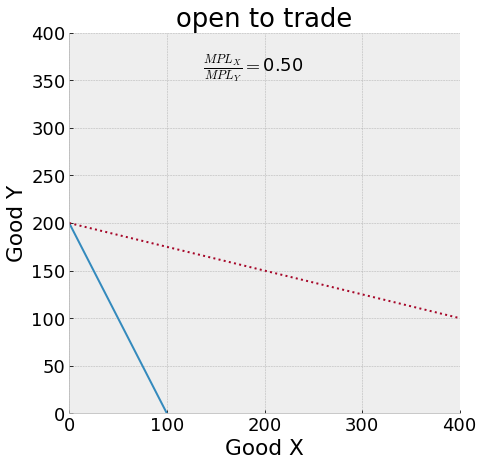

In [9]:
homeopen(pw=1/4, mplx=1,mply=2,lbar=100, title='open to trade')
plt.show()

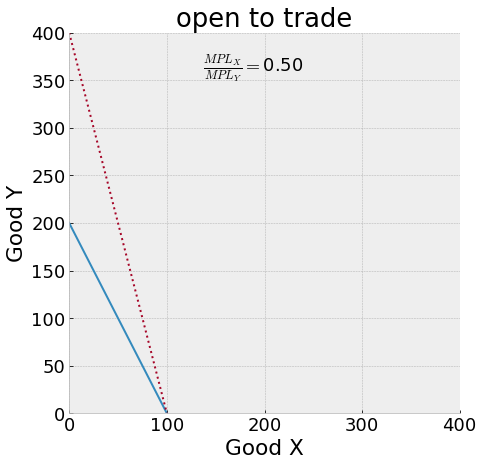

In [10]:
homeopen(pw=4, mplx=1,mply=2,lbar=100, title='open to trade')
plt.show()